In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!unzip '/content/gdrive/MyDrive/house-prices-advanced-regression-techniques.zip'

Archive:  /content/gdrive/MyDrive/house-prices-advanced-regression-techniques.zip
   creating: house-prices-advanced-regression-techniques/
  inflating: __MACOSX/._house-prices-advanced-regression-techniques  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: __MACOSX/house-prices-advanced-regression-techniques/._test.csv  
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: __MACOSX/house-prices-advanced-regression-techniques/._data_description.txt  
  inflating: house-prices-advanced-regression-techniques/train.csv  
  inflating: __MACOSX/house-prices-advanced-regression-techniques/._train.csv  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: __MACOSX/house-prices-advanced-regression-techniques/._sample_submission.csv  


In [108]:
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
data.shape

(1460, 81)

In [110]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [111]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

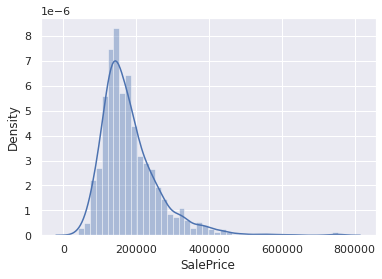

In [112]:
sns.distplot(y_train)

In [113]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [115]:
num = list(X_train.dtypes[X_train.dtypes == "float64"].index)
int_list = list(X_train.dtypes[X_train.dtypes == "int64"].index)
num = num + int_list

In [116]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [117]:
lregr = LinearRegression().fit(X_train[num], y_train)
r_regr = Ridge().fit(X_train[num], y_train)
las_regr = Lasso().fit(X_train[num], y_train)

In [118]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
from sklearn.metrics import make_scorer

def rmse(true, predictions):
  return math.sqrt(np.square(np.subtract(true,predictions)).mean())

loss_rmse  = make_scorer(rmse, greater_is_better=False)
score_rmse = make_scorer(rmse, greater_is_better=True)

In [119]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

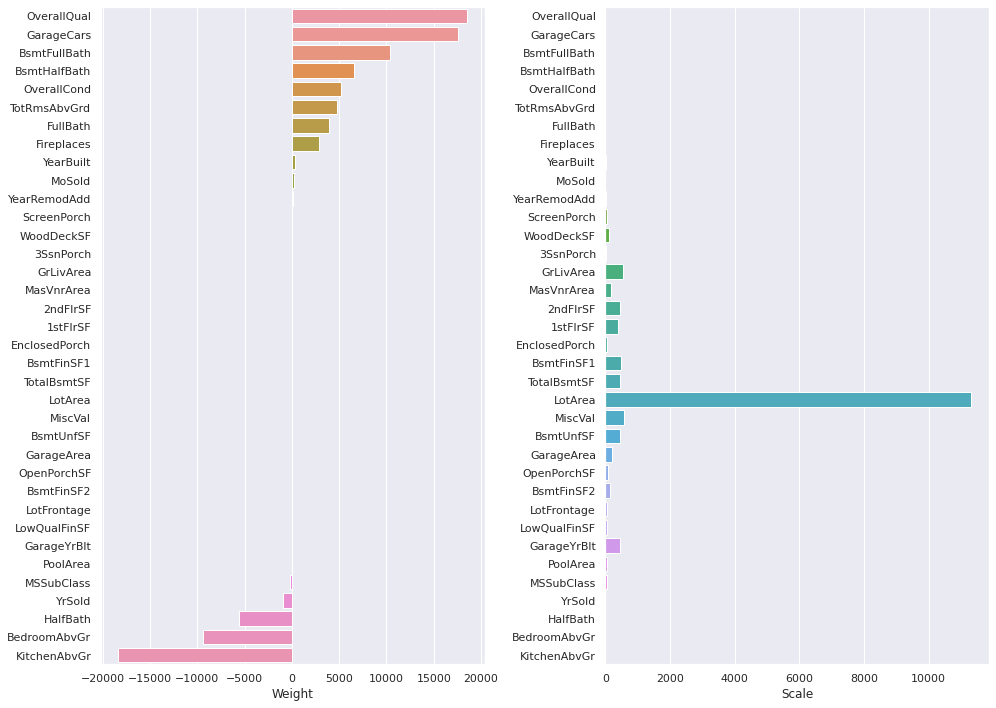

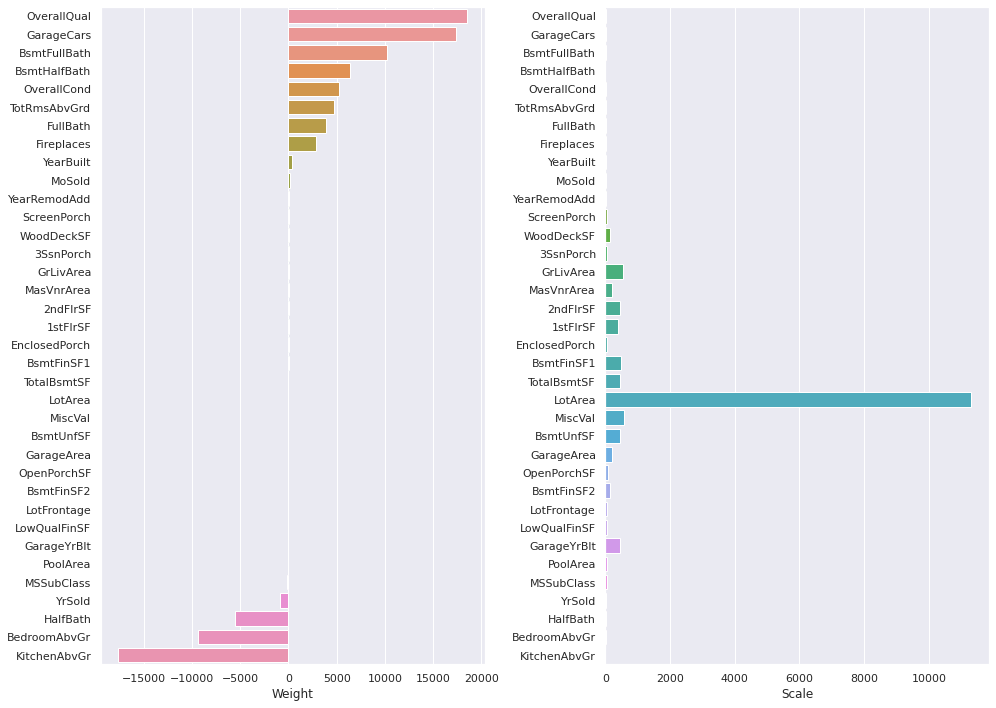

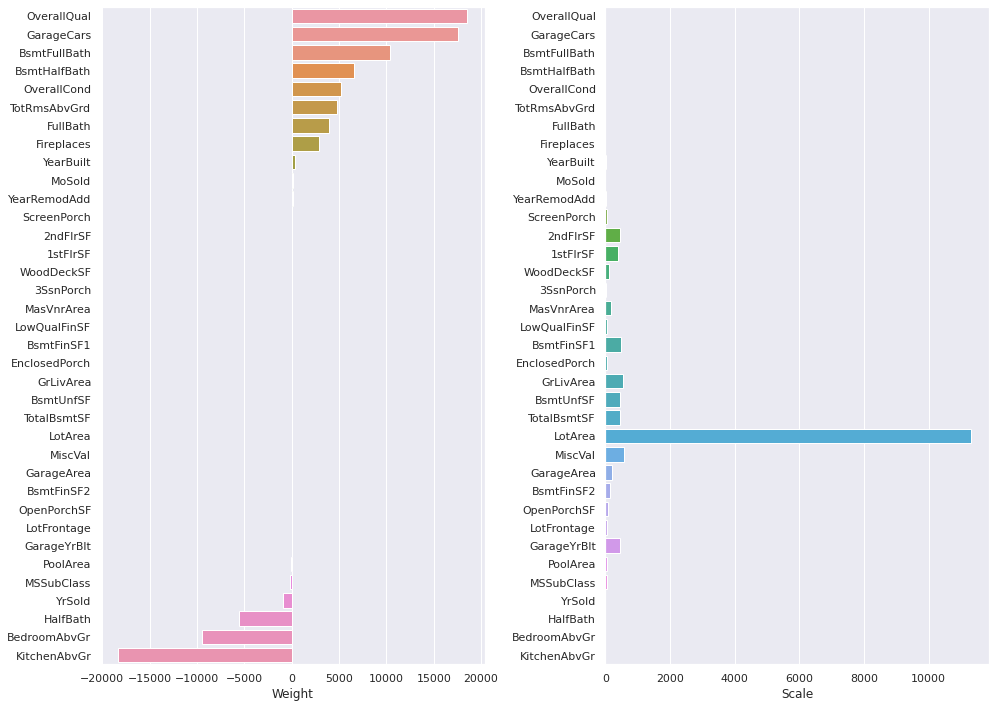

In [120]:
show_weights(num, lregr.coef_, X_train[num].std())
show_weights(num, r_regr.coef_, X_train[num].std())
show_weights(num, las_regr.coef_, X_train[num].std())

In [121]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])

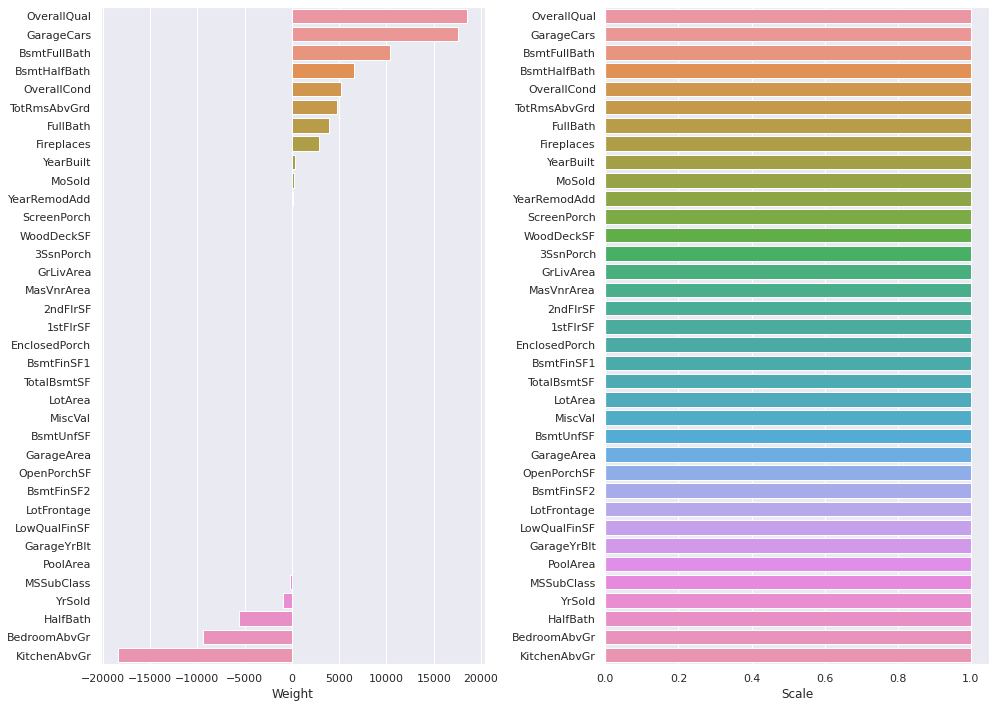

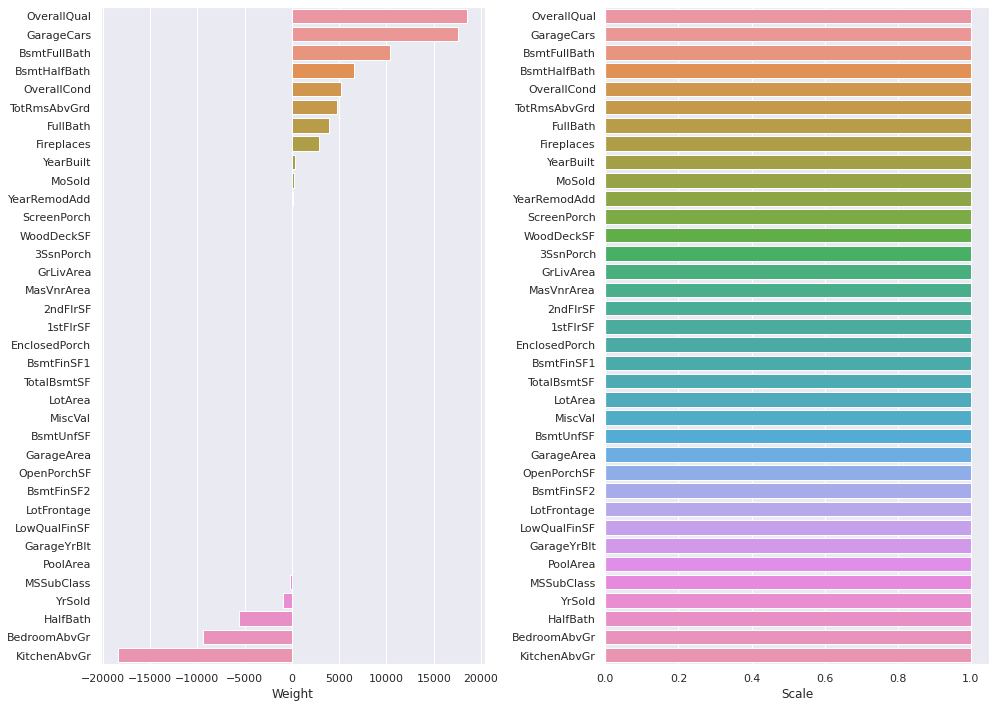

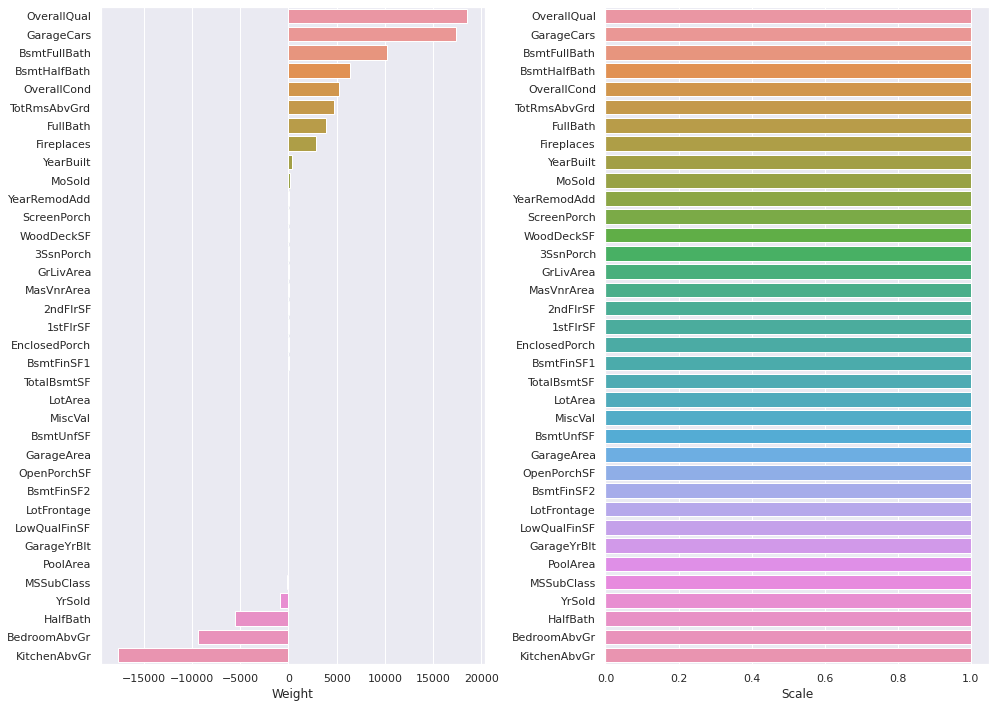

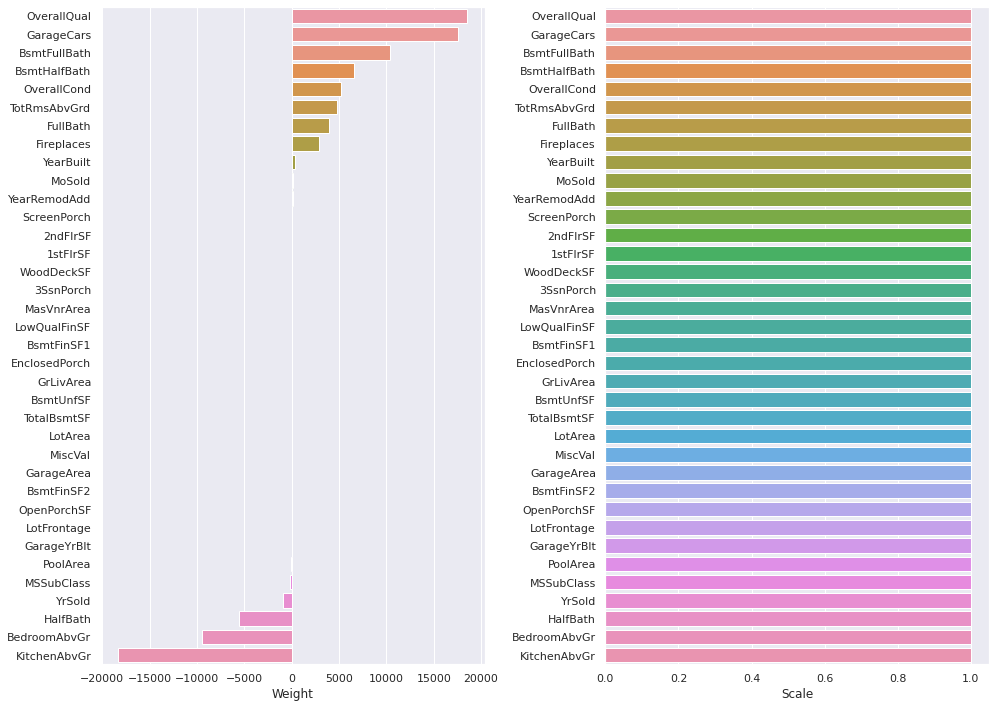

In [122]:
scales = pd.Series(data=X_train[num].std(axis=0), index=num)
show_weights(num, lregr.coef_, scales)
show_weights(num, lregr.coef_, scales)
show_weights(num, r_regr.coef_, scales)
show_weights(num, las_regr.coef_, scales)

In [123]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
from sklearn.model_selection import GridSearchCV

gbr_grid_search = GridSearchCV(cv = 5, estimator= Lasso(), 
                               param_grid = [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10,100]}],
                               error_score = loss_rmse)
gbr_grid_search.fit(X_train[num], y_train)

GridSearchCV(cv=5, error_score=make_scorer(rmse, greater_is_better=False),
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.7215344204015662
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [125]:
gbr_grid_search = GridSearchCV(cv = 5, estimator= Ridge(), 
                               param_grid = [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10,100]}],
                               error_score = loss_rmse)
gbr_grid_search.fit(X_train[num], y_train)

GridSearchCV(cv=5, error_score=make_scorer(rmse, greater_is_better=False),
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.7311134527221513
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [127]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
from sklearn.pipeline import Pipeline

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha= 100))])
lasso_pipe.fit(X_train[num], y_train)
lasso_pipe.score(X_train[num], y_train)

0.806933518730892

In [128]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha= 100))])
pipe.fit(X_train[num], y_train)
pipe.score(X_train[num], y_train)

0.8041455113563719

In [129]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [130]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
72,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,0,0,0,WD,Normal
1138,RL,Pave,0,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,ImStucc,None,TA,TA,PConc,TA,TA,Gd,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
253,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,Gd,LwQ,ALQ,GasA,Ex,Y,SBrkr,Gd,Min1,0,Attchd,RFn,TA,TA,Y,0,MnPrv,0,CWD,Normal
1070,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,0,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal
805,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,0,Attchd,RFn,TA,TA,Y,0,0,0,New,Partial


In [131]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
def get_one_hot(data):
  for column in categorical:
      tempdf = pd.get_dummies(data[column], prefix=column)
      data = pd.merge(
          left=data,
          right=tempdf,
          left_index=True,
          right_index=True,
      )
  data = data.drop(categorical, axis=1)
  return data

In [145]:
X_new = get_one_hot(X)

In [146]:
X_train_new, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=10)
X_train_new = X_train_new.fillna(0)
X_test = X_test.fillna(0)

In [147]:
X_train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,30,51.0,6120,5,7,1925,1950,0.0,489,0,279,768,1015,0,0,1015,0,0,1,0,3,1,6,0,1925.0,1,450,0,0,112,0,120,0,620,7,2006,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
373,20,79.0,10634,5,6,1953,1953,0.0,428,180,0,608,1319,0,0,1319,1,0,1,0,3,1,5,0,1953.0,1,270,66,0,0,0,0,0,0,11,2009,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
20,60,101.0,14215,8,5,2005,2006,380.0,0,0,1158,1158,1158,1218,0,2376,0,0,3,1,4,1,9,1,2005.0,3,853,240,154,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
800,60,79.0,12798,6,5,1997,1997,0.0,462,0,154,616,616,1072,0,1688,1,0,2,1,4,1,8,0,1997.0,2,603,403,114,185,0,0,0,400,5,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
152,60,0.0,14803,6,5,1971,1971,252.0,416,0,409,825,1097,896,0,1993,0,0,2,1,4,1,8,1,1971.0,2,495,0,66,0,0,0,0,0,6,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [148]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", X_train_new.shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 288)


In [149]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 100))])
pipe.fit(X_train_new, y_train)
pipe.score(X_train_new, y_train)

0.9306094765152148

In [150]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha= 100))])
lasso_pipe.fit(X_train_new, y_train)
lasso_pipe.score(X_train_new, y_train)

0.9341541230898407

In [151]:
ridge_zeros = np.sum(pipe.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipe.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 9
Zero weights in Lasso: 84


In [152]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
                               error_score=loss_rmse)
gbr_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=None, error_score=make_scorer(rmse, greater_is_better=False),
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 10}
0.770997265476496
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [154]:
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
                               error_score=loss_rmse)
gbr_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=None, error_score=make_scorer(rmse, greater_is_better=False),
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.0001, 0.001, 0.1, 0.5, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [155]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 100}
0.7715003684934268
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [156]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 10))])
pipe.fit(X_train_new, y_train)
pipe.score(X_train_new, y_train)

0.9352806192605416

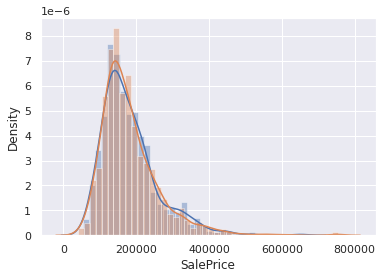

In [157]:
error = (y_train - pipe.predict(X_train_new)) ** 2
sns.distplot(pipe.predict(X_train_new))
sns.distplot(y_train)

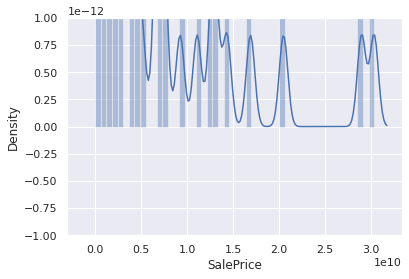

In [158]:
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [159]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
quan = np.quantile(error, 0.95)
print(quan)
X_mask = X_train_new[(y_train - pipe.predict(X_train_new)) ** 2 < quan]
print(X_train_new.shape, X_mask.shape)
y_mask = y_train[(y_train - pipe.predict(X_train_new)) ** 2 < quan]

1233408864.627315
(1022, 288) (970, 288)


In [160]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha= 10))])
pipe.fit(X_mask, y_mask)
pipe.score(X_mask, y_mask)

0.972575491677473

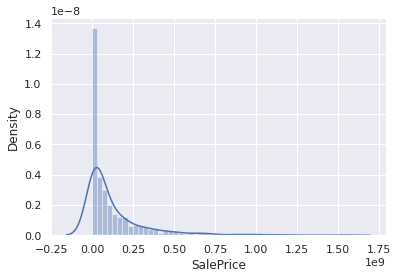

In [161]:
error = (y_mask - pipe.predict(X_mask)) ** 2
sns.distplot(error)

In [163]:
print(X_test.columns.difference(X_mask.columns))

Index([], dtype='object')


In [164]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
pred = pipe.predict(X_test)
rmse(y_test, pred)

25080.478834684338

In [165]:
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha= 100))])
lasso_pipe.fit(X_mask, y_mask)
lasso_pipe.score(X_mask, y_mask)

0.9713942972932913

In [167]:
lasso_pred = lasso_pipe.predict(X_test)  #у Lasso на 1000 лучше скор чем у Ridge
rmse(y_test, lasso_pred)

24052.07982603776